## Libreries Imports

In [1]:
import json                       # Read and write files in json
import numpy as np                # Matrix operations
import networkx as nx             # Graph operation and display
from pprint import pprint         # Pretty printing of matrices
import matplotlib.pyplot as plt   # Plot figures

In [2]:
# Set seed for reproducibility
np.random.seed(420)

# Settings

In [3]:
n_of_vertecies = 7             # n of vertices of the graph
round_decimals = 3             # n of decimal places to round the weights
figure_size = (5,5)            # (x,y) expressed in inches
node_color = "#89b2f4"         # Color of the nodes of the graph in the #RRBBGG format
file_path = "test_graph.json"  # path to the output file

## Creating the test Graph
For convinence we create a weighted graph  as an adjacency matrix that then we will convert to an adjacency Lists as the Algorithm needs.

We create a random matrix using an uniform distributions between -1 and 1. then all the values less than zero are set to zero so we get a random weighted graph.

In [4]:
# Create the random matrix with values between -1,1
graph_matrix = 2*np.random.random((n_of_vertecies,n_of_vertecies)).astype(float)- 1
# Keep only the positive values so that the matrix is half full
graph_matrix[graph_matrix < 0] = 0
# Keep only the upper triangle of the matrix
graph_matrix = np.triu(graph_matrix)
# Make the matrix simmetrics (sum the matrix with it's transpose)
graph_matrix = graph_matrix + graph_matrix.T
# Remove auto-loops
np.fill_diagonal(graph_matrix,0)
# Print the results
pprint(graph_matrix)

array([[0.        , 0.        , 0.        , 0.        , 0.73633296,
        0.25945704, 0.        ],
       [0.        , 0.        , 0.19732172, 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.19732172, 0.        , 0.        , 0.53515984,
        0.72703328, 0.55524095],
       [0.        , 0.        , 0.        , 0.        , 0.24050263,
        0.        , 0.        ],
       [0.73633296, 0.        , 0.53515984, 0.24050263, 0.        ,
        0.38481269, 0.28958349],
       [0.25945704, 0.        , 0.72703328, 0.        , 0.38481269,
        0.        , 0.        ],
       [0.        , 0.        , 0.55524095, 0.        , 0.28958349,
        0.        , 0.        ]])


## TODO CHECK THAT ALL THE WEIGHTS HAVE UNIQUE VALUES

now to convert the adjacency matrix to an adjacency list we just iterate over the rows of the matrix e save the cols indecies where the value are bigger than 0

In [5]:
# Convert the matrix to an adjacency list
graph_list = [
                [
                    # Create a tuple (end,weight) rounding the weight
                    (int(valore),round(graph_matrix[row][valore],round_decimals))
                    # For each value bigger than zero in the row of the "row" node
                    for valore in np.where(graph_matrix[row] > 0)[0]
                ] 
                # For each node of the graph
                for row in range(n_of_vertecies)
            ]
pprint(graph_list)

[[(4, 0.736), (5, 0.259)],
 [(2, 0.197)],
 [(1, 0.197), (4, 0.535), (5, 0.727), (6, 0.555)],
 [(4, 0.241)],
 [(0, 0.736), (2, 0.535), (3, 0.241), (5, 0.385), (6, 0.29)],
 [(0, 0.259), (2, 0.727), (4, 0.385)],
 [(2, 0.555), (4, 0.29)]]


### Structure Description

The$i$th list corrispond to the $i$th vertex.
i.e. ```grap_list[1]``` return the values for the vertex $1$.

For each vertex there is alist of tuples in the form ```(Destination_vertex,weight)```
    

## Save the graph to the file

In [6]:
# Open the file in writting mode and save the graph to it
with open(file_path, "w") as f:
    json.dump(graph_list,f, indent=4)

# Display the Graph

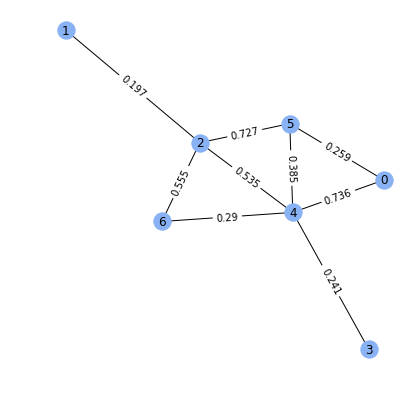

In [7]:
# Create an empty graph
g = nx.Graph()

# add all the vertecies to the graph
for i in range(n_of_vertecies):
    g.add_node(i)

# Add all the edges to the graph
for start in range(n_of_vertecies):
    for end,weight in graph_list[start]:
        g.add_edge(start,end,weight=weight)
        
# Display the Graph
# Create and set the dimension of the final image
plt.figure(figsize=figure_size)
# Calculate the spatial disposition of the nodes using the spring algorithm
pos = nx.spring_layout(g)
# Draw the graph
nx.draw(g,pos, with_labels=True,node_color=node_color)
# Draw the weight labels over the edges
nx.draw_networkx_edge_labels(g,pos,edge_labels=nx.get_edge_attributes(g,"weight"))
# Show the result
plt.show()